In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

from sklearn.cluster import *

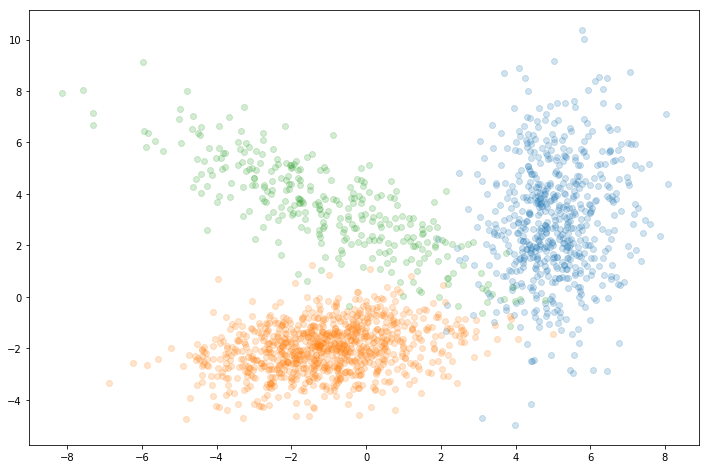

In [2]:
cluster_1 = np.random.multivariate_normal(
    mean=np.array([5.0, 3.0]),
    cov=np.array([[1.0, 0.2],
                  [0.2, 5.0]]),
    size=600)


cluster_2 = np.random.multivariate_normal(
    mean=np.array([-1., -2.]),
    cov=np.array([[3.0, 0.5],
                  [0.5, 1.0]]),
    size=900)


cluster_3 = np.random.multivariate_normal(
    mean=np.array([-1, 3.5]),
    cov=np.array([[5.0, -3.],
                  [-3., 3.0]]),
    size=300)


all_points = np.concatenate([cluster_1, cluster_2, cluster_3], axis=0)
labels = np.concatenate([
    np.full(fill_value=0, shape=cluster_1.shape[0]),
    np.full(fill_value=1, shape=cluster_2.shape[0]),
    np.full(fill_value=2, shape=cluster_3.shape[0])
], axis=0)


plt.figure(figsize=(12, 8))
plt.scatter(cluster_1[:,0], cluster_1[:,1], alpha=0.2)
plt.scatter(cluster_2[:,0], cluster_2[:,1], alpha=0.2)
plt.scatter(cluster_3[:,0], cluster_3[:,1], alpha=0.2)
plt.show()

In [3]:
k_means = KMeans(n_clusters=3)
k_means.fit(all_points)
centroids = k_means.cluster_centers_
print(centroids)

[[-1.06189006 -1.97180248]
 [ 4.8384977   2.84332108]
 [-1.86884466  4.08836436]]


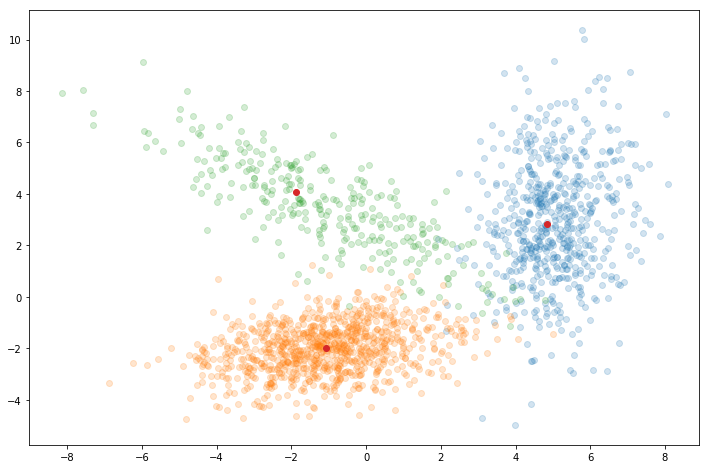

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(cluster_1[:,0], cluster_1[:,1], alpha=0.2)
plt.scatter(cluster_2[:,0], cluster_2[:,1], alpha=0.2)
plt.scatter(cluster_3[:,0], cluster_3[:,1], alpha=0.2)
plt.scatter(centroids[:,0], centroids[:,1], marker='o')
plt.show()

In [5]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Linear(2, 3)
        self.softmax = nn.Softmax(dim=-1)
    
    def forward(self, xs, with_softmax=True):
        xs = self.model(xs)
        return self.softmax(xs) if with_softmax else xs

model = LinearClassifier()
    
xs = torch.FloatTensor(all_points)
ys = torch.LongTensor(labels)
train = data.TensorDataset(xs, ys)
loader = data.DataLoader(train, batch_size=100, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for _ in range(5):
    total_loss = 0.
    for x, y in loader:
        pred = model(x, with_softmax=False)
        loss = criterion(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)

probs = model(torch.FloatTensor(all_points))
predictions = torch.argmax(probs, dim=-1).numpy()

10.255894541740417
2.7165032252669334
2.1399007700383663
1.8368460424244404
1.7137807793915272


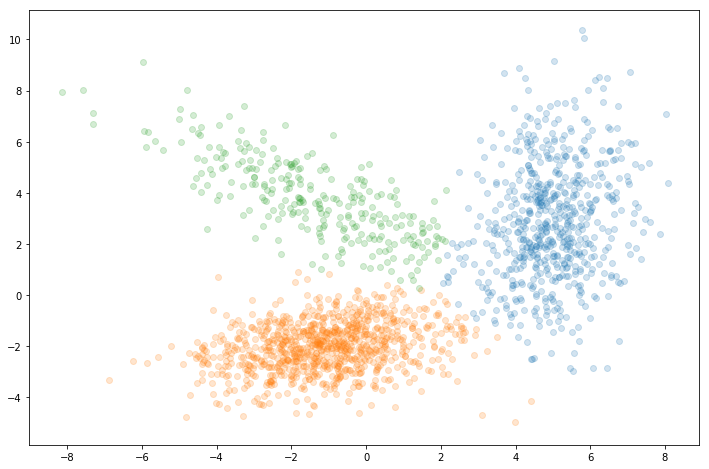

Parameter containing:
tensor([[ 0.8931,  0.4460],
        [-1.3559, -1.6795],
        [-0.6721,  0.5680]], requires_grad=True)
Parameter containing:
tensor([-2.8410,  1.7570,  0.3187], requires_grad=True)


In [6]:
pred_1 = all_points[np.where(predictions==0)]
pred_2 = all_points[np.where(predictions==1)]
pred_3 = all_points[np.where(predictions==2)]

plt.figure(figsize=(12, 8))
plt.scatter(pred_1[:,0], pred_1[:,1], alpha=0.2)
plt.scatter(pred_2[:,0], pred_2[:,1], alpha=0.2)
plt.scatter(pred_3[:,0], pred_3[:,1], alpha=0.2)
plt.show()

print(model.model.weight)
print(model.model.bias)